#    Data Science Capstone Project
## Predictive Modelling for COVID-19 in Public Health

## Aim of the Project
##### The primary aim of this project is to analyze COVID-19 data from various countries, identify patterns and correlations between key variables, and build predictive models for understanding and forecasting COVID-19 metrics, such as Mortality and Survival rate.

## Objectives
##### Data Exploration: Gain insights into global COVID-19 trends by exploring cases, deaths, recoveries, and testing metrics.
Feature Engineering: Create meaningful derived metrics, such as case fatality rate and recovery rate, to enhance analysis.
Correlation Analysis: Identify relationships between variables to uncover influential factors in COVID-19 outcomes.
 Predictive Modeling: Develop machine learning models, such as Linear Regression and Random Forest, to predict COVID-19 cases and classify case severity.
Insights for Decision Making: Use visualizations and model results to provide actionable insights for public health policies.

##### To proceed,we need to import the neccesary dependent libraries 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, PoissonRegressor, ridge_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, classification_report, roc_auc_score, mean_squared_error, r2_score, mean_absolute_error
import sklearn.preprocessing as pre
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
sns.set(style="darkgrid")

##### Explanation of Each Library
##### pandas (pd):

It is used for data manipulation and analysis.
It is essential for handling structured data like DataFrames (tables).


 ##### numpy (np):
* ##### It provides support for numerical computations.
It offers functions for array manipulation, linear algebra, and mathematical operations.

 ##### matplotlib.pyplot (plt):

* ##### It is used for creating static, animated, and interactive plots.
It allows for highly customizable visualizations like bar charts and scatter plots.

* ##### seaborn (sns):

##### It is built on Matplotlib for advanced statistical graphics.
It makes it easier to create aesthetically pleasing visualizations (e.g., heatmaps, box plots).
Setting the style to "darkgrid" enhances plot readability.

* ##### sklearn.linear_model:

 ##### It contains machine learning models for regression and classification tasks:
* ##### LinearRegression: It predicts continuous outcomes using linear relationships.
* ##### LogisticRegression: It is used for binary or multi-class classification problems.
* ##### PoissonRegressor: It handles count data or events per unit of time.
* ##### ridge_regression: It is type of linear regression with regularization to prevent overfitting.

* ##### sklearn.preprocessing:

  ##### It provides tools for data preprocessing:
* ##### StandardScaler: It standardizes features by removing the mean and scaling to unit variance.
* ##### Other utilities (pre): It handles encoding, normalization, and other preprocessing tasks.

* ##### sklearn.model_selection:

 ##### It contains tools to split data into training and testing sets:
* ##### train_test_split: It divides datasets into training and testing subsets.

* ##### sklearn.metrics:

 ##### It is used to evaluate the performance of models with metrics like:
* ##### r2_score: It measures how well a regression model fits the data.
* ##### confusion_matrix: It evaluates classification models.
* ##### accuracy_score: It checks overall prediction accuracy.
* ##### classification_report: It summarizes precision, recall, and F1 scores.
* ##### roc_auc_score: It evaluates the ability of a classifier to distinguish between classes.
* ##### mean_squared_error: It measures error in regression predictions.
* ##### mean_absolute_error: It computes average absolute differences between predictions and actuals.

##### sklearn.tree:

* ##### DecisionTreeClassifier: It implements a tree-based classification algorithm, splitting data into branches based on feature values.

##### sklearn.ensemble:

* ##### RandomForestClassifier: It is an ensemble learning method combining multiple decision trees to improve accuracy and reduce overfitting.

### Overall Purpose

##### These libraries collectively facilitate:

* ##### Data manipulation and preprocessing (pandas, numpy, sklearn.preprocessing).
* ##### Exploratory data analysis (matplotlib, seaborn).
* ##### Machine learning modeling and evaluation (sklearn.linear_model, sklearn.tree, sklearn.ensemble, sklearn.metrics).
* ##### Improved data visualization through styling with seaborn's dark grid theme.

### We will then load the necessary libraries. 
##### The code below loads data from a CSV file named worldometer_data.csv into a pandas DataFrame called cov_19. 
We can also Check the Data:

After loading the dataset, inspect it to understand its structure using:

* ##### cov_19.head() To view the first 5 rows of the dataset
* ##### cov_19.info() To check data types and non-null counts
* ##### cov_19.describe() To get summary statistics for numerical columns

In [7]:
cov_19 = pd.read_csv(r"C:\Users\USER\AppData\Local\Temp\Rar$DRa10676.45842.rartemp\worldometer_data.csv")

In [8]:
cov_19

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [9]:
cov_19.info(
    
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [10]:
cov_19.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [11]:
cov_19.describe()

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,2.080000e+02,2.090000e+02,4.000000,188.000000,3.000000,2.050000e+02,3.000000,2.050000e+02,122.000000,208.000000,187.000000,1.910000e+02,191.000000
mean,3.041549e+07,9.171850e+04,1980.500000,3792.590426,300.000000,5.887898e+04,1706.000000,2.766433e+04,534.393443,3196.024038,98.681176,1.402405e+06,83959.366492
std,1.047661e+08,4.325867e+05,3129.611424,15487.184877,451.199512,2.566984e+05,2154.779803,1.746327e+05,2047.518613,5191.986457,174.956862,5.553367e+06,152730.591240
min,8.010000e+02,1.000000e+01,20.000000,1.000000,1.000000,7.000000e+00,42.000000,0.000000e+00,1.000000,3.000000,0.080000,6.100000e+01,4.000000
25%,9.663140e+05,7.120000e+02,27.500000,22.000000,40.500000,3.340000e+02,489.000000,8.600000e+01,3.250000,282.000000,6.000000,2.575200e+04,8956.500000
50%,7.041972e+06,4.491000e+03,656.000000,113.000000,80.000000,2.178000e+03,936.000000,8.990000e+02,27.500000,1015.000000,29.000000,1.357020e+05,32585.000000
75%,2.575614e+07,3.689600e+04,2609.000000,786.000000,449.500000,2.055300e+04,2538.000000,7.124000e+03,160.250000,3841.750000,98.000000,7.576960e+05,92154.500000
max,1.381345e+09,5.032179e+06,6590.000000,162804.000000,819.000000,2.576668e+06,4140.000000,2.292707e+06,18296.000000,39922.000000,1238.000000,6.313960e+07,995282.000000


In [12]:
cov_19.isnull().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [13]:
cov_19.fillna(0, inplace= True)
cov_19 = cov_19[cov_19['Continent'] != '0']

For clarity sake, here's a list of the new columns created and their purposes to derive additional insights from the data. Specifically, these columns include measures like **daily growth rates** and **cases per population** to better understand trends and impacts. Here's what was done:

### 1. **Daily Growth Rate of Cases**:
- A column for the **daily growth rate of cases** might be computed as:
  \[
  \text{Daily Growth Rate of Cases} = \frac{\text{NewCases}}{\text{TotalCases}} \times 100
  \]
  This helps track how rapidly cases are increasing as a percentage of the total.

### 2. **Daily Growth Rate of Deaths**:
- Similarly, the **daily growth rate of deaths** could be calculated as:
  \[
  \text{Daily Growth Rate of Deaths} = \frac{\text{NewDeaths}}{\text{TotalDeaths}} \times 100
  \]
  This metric provides insight into the increase in death rates relative to the total deaths.

### 3. **Cases Per Population**:
- A column for **cases per population** is often derived to normalize case counts by population size:
  \[
  \text{Cases Per Population} = \frac{\text{TotalCases}}{\text{Population}} \times 100
  \]
  This enables comparisons between countries with vastly different population sizes.

### Explanation in the Context of the Notebook:
- These derived features would be calculated using pandas, and new columns would be added to the `cov_19` DataFrame. For instance:
  ```python
  cov_19['Daily_Cases_Growth_Rate'] = (cov_19['NewCases'] / cov_19['TotalCases']) * 100
  cov_19['Daily_Deaths_Growth_Rate'] = (cov_19['NewDeaths'] / cov_19['TotalDeaths']) * 100
  cov_19['Cases_Per_Population'] = (cov_19['TotalCases'] / cov_19['Population']) * 100
  ```

### Why These Features Are Important:
- **Daily growth rates** help identify trends and evaluate the effectiveness of mitigation strategies.
- **Cases per population** normalizes raw counts, providing a fair comparison across regions with different population sizes.



# 1. Daily Growth Rate of Cases

In [16]:

cov_19["Daily Growth Rate of Cases (%)"] = (cov_19["NewCases"] / (cov_19["TotalCases"] - cov_19["NewCases"])) * 100

In [17]:
cov_19['Daily Growth Rate of Cases (%)'].value_counts().reset_index()

,Daily Growth Rate of Cases (%),count
0,0.000000,205
1,1.444859,1
2,1.505738,1
3,0.137941,1
4,3.232759,1


In [18]:
cov_19['Daily Growth Rate of Cases (%)'].sum()

6.321295293212662

# 2. Daily Growth Rate of Deaths

In [20]:
cov_19["Daily Growth Rate of Deaths (%)"] = (cov_19["NewDeaths"] / (cov_19["TotalDeaths"] - cov_19["NewDeaths"])) * 100


In [21]:
cov_19['Daily Growth Rate of Deaths (%)'].value_counts().reset_index()

,Daily Growth Rate of Deaths (%),count
0,0.000000,185
1,1.647954,1
2,2.363368,1
3,0.331126,1


In [22]:
cov_19['Daily Growth Rate of Deaths (%)'].sum()

4.34244726691382

# 3. Cases per Population

In [24]:

cov_19["Cases per 1M Population"] = (cov_19["TotalCases"] / cov_19["Population"])

In [25]:
cov_19['Cases per 1M Population'].value_counts().reset_index()

,Cases per 1M Population,count
0,0.015194,1
1,0.000292,1
2,0.000314,1
3,0.000045,1
4,0.000379,1
...,...,...
204,0.002469,1
205,0.002621,1
206,0.004086,1
207,0.001874,1


In [26]:
cov_19['Cases per 1M Population'].sum()

inf

In [27]:
cov_19['DeathRate'] = cov_19['TotalDeaths'] / cov_19['TotalCases']
cov_19['RecoveryRate'] = cov_19['TotalRecovered'] / cov_19['TotalCases']

In [28]:
cov_19

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,...,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,Daily Growth Rate of Cases (%),Daily Growth Rate of Deaths (%),Cases per 1M Population,DeathRate,RecoveryRate
0,USA,North America,3.311981e+08,5032179,0.0,162804.0,0.0,2576668.0,0.0,2292707.0,...,15194.0,492.0,63139605.0,190640.0,Americas,0.0,0.0,0.015194,0.032353,0.512038
1,Brazil,South America,2.127107e+08,2917562,0.0,98644.0,0.0,2047660.0,0.0,771258.0,...,13716.0,464.0,13206188.0,62085.0,Americas,0.0,0.0,0.013716,0.033810,0.701839
2,India,Asia,1.381345e+09,2025409,0.0,41638.0,0.0,1377384.0,0.0,606387.0,...,1466.0,30.0,22149351.0,16035.0,South-EastAsia,0.0,0.0,0.001466,0.020558,0.680052
3,Russia,Europe,1.459409e+08,871894,0.0,14606.0,0.0,676357.0,0.0,180931.0,...,5974.0,100.0,29716907.0,203623.0,Europe,0.0,0.0,0.005974,0.016752,0.775733
4,South Africa,Africa,5.938157e+07,538184,0.0,9604.0,0.0,387316.0,0.0,141264.0,...,9063.0,162.0,3149807.0,53044.0,Africa,0.0,0.0,0.009063,0.017845,0.719672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,0.0,1.0,0.0,10.0,0.0,2.0,...,2604.0,200.0,61.0,12220.0,0,0.0,0.0,0.002604,0.076923,0.769231
205,Caribbean Netherlands,North America,2.624700e+04,13,0.0,0.0,0.0,7.0,0.0,6.0,...,495.0,0.0,424.0,16154.0,0,0.0,NaN,0.000495,0.000000,0.538462
206,Falkland Islands,South America,3.489000e+03,13,0.0,0.0,0.0,13.0,0.0,0.0,...,3726.0,0.0,1816.0,520493.0,0,0.0,NaN,0.003726,0.000000,1.000000
207,Vatican City,Europe,8.010000e+02,12,0.0,0.0,0.0,12.0,0.0,0.0,...,14981.0,0.0,0.0,0.0,Europe,0.0,NaN,0.014981,0.000000,1.000000


# EDA analysis

> ### 1. Total death and survived by continent

In [31]:
Total_Mortality_by_cont = cov_19.groupby(["Continent"])[['TotalDeaths', 'TotalRecovered']].sum().reset_index()

Total_Mortality_by_cont
Total_Mortality_by_cont.drop(0, inplace = True)

In [32]:
Total_Mortality_by_cont

,Continent,TotalDeaths,TotalRecovered
1,Africa,22114.0,693620.0
2,Asia,100627.0,3508170.0
3,Australia/Oceania,281.0,12620.0
4,Europe,205232.0,1587302.0
5,North America,229855.0,3151678.0
6,South America,154885.0,3116150.0


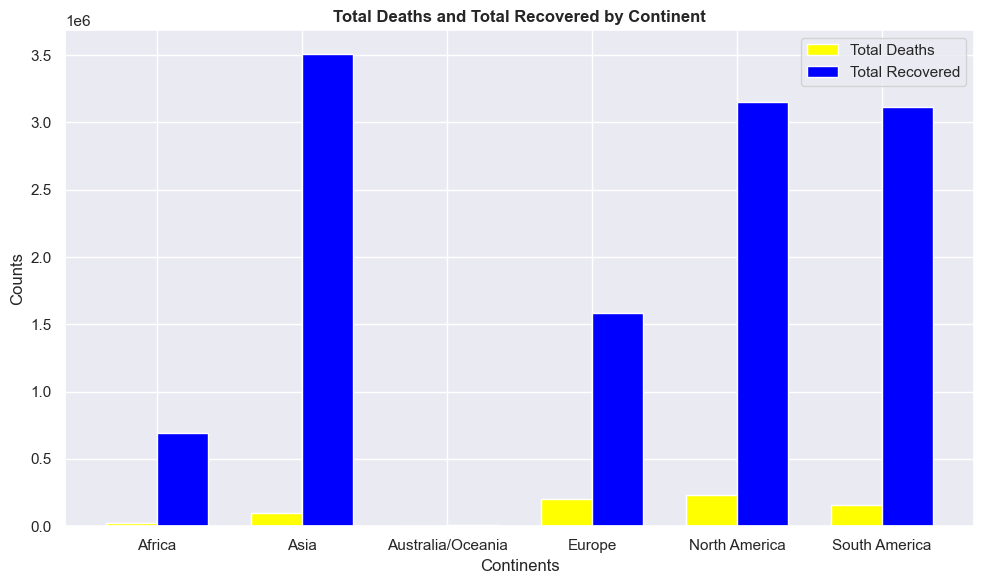

In [33]:


# Data
x = np.arange(len(Total_Mortality_by_cont['Continent']))
width = 0.35  

plt.figure(figsize=(10,6),facecolor= "white")

plt.bar(x - width/2, Total_Mortality_by_cont['TotalDeaths'], color='yellow', width=width, label='Total Deaths')
plt.bar(x + width/2, Total_Mortality_by_cont['TotalRecovered'], color='blue', width=width, label='Total Recovered')

plt.xlabel('Continents')
plt.ylabel('Counts')
plt.title('Total Deaths and Total Recovered by Continent', fontfamily = "Arial", fontweight = "bold", fontsize = 12)
plt.xticks(x, Total_Mortality_by_cont['Continent'])

plt.legend()

plt.tight_layout()
plt.show()


### 2. Top 10 country with the highest Case**

In [35]:
Top_10_case1 = cov_19.groupby(["Country/Region"])[['TotalCases']].sum()
Top_10_case1.sort_values(by= "TotalCases", ascending= False, inplace= True)
Top_10_case = Top_10_case1.head(10)
Top_10_case

,TotalCases
Country/Region,
USA,5032179
Brazil,2917562
India,2025409
Russia,871894
South Africa,538184
Mexico,462690
Peru,455409
Chile,366671
Colombia,357710


In [36]:
least_10_case = Top_10_case1.tail(5)
least_10_case

,TotalCases
Country/Region,
Caribbean Netherlands,13
Falkland Islands,13
Montserrat,13
Vatican City,12
Western Sahara,10


C:\Users\USER\AppData\Local\Temp\ipykernel_16348\1795414775.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = Top_10_case, x="Country/Region", y= "TotalCases", palette="dark", ax=axes[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_16348\1795414775.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=least_10_case, x="Country/Region", y="TotalCases", palette="coolwarm", ax=axes[1])


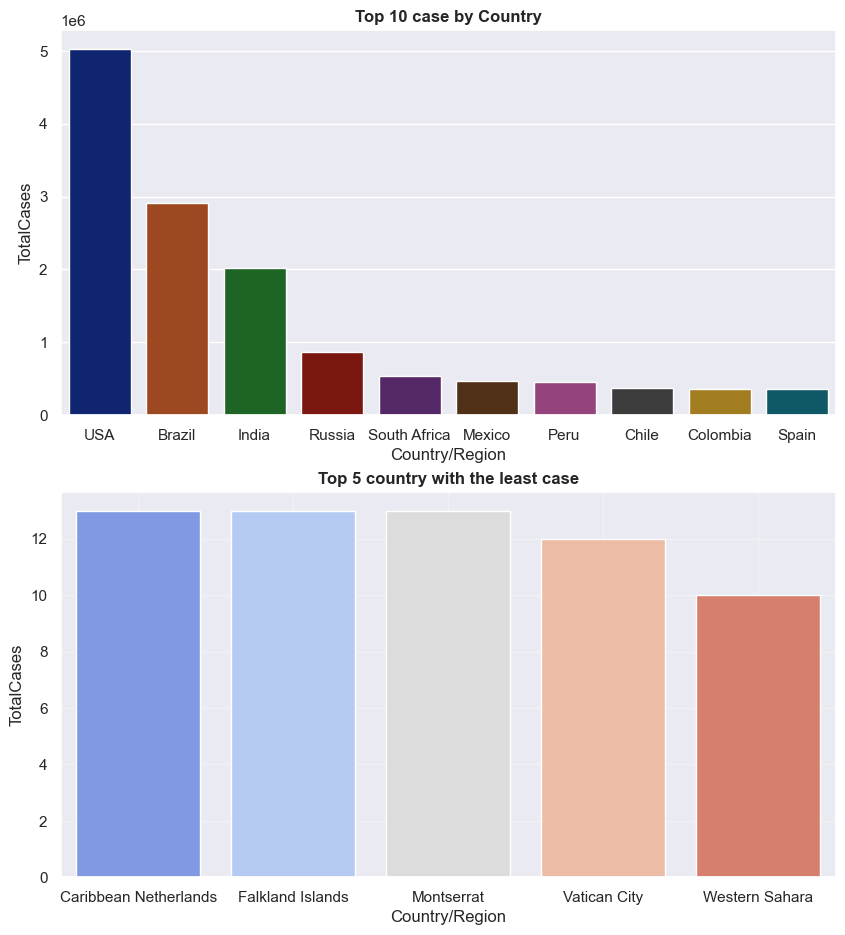

In [37]:
fig, axes = plt.subplots(2, 1, figsize=(10,11))
sns.barplot(data = Top_10_case, x="Country/Region", y= "TotalCases", palette="dark", ax=axes[0])
axes[0].set_title("Top 10 case by Country", fontfamily = "Arial", fontweight = "bold", fontsize = 12)


sns.barplot(data=least_10_case, x="Country/Region", y="TotalCases", palette="coolwarm", ax=axes[1])
axes[1].set_title("Top 5 country with the least case", fontfamily="Arial", fontweight="bold", fontsize=12)
axes[1].grid(alpha=0.3)

> **Top 10 country with the highest Death**

In [39]:
Top_10_death_rate = cov_19.groupby(['Country/Region'])[["TotalDeaths"]].sum().reset_index()
Top_10_death_rate.sort_values(by= "TotalDeaths", ascending= False, inplace= True)
Top_10_death_rate = Top_10_death_rate.head(10).reset_index()
Top_10_death_rate.drop("index", axis = 1, inplace= True)
Top_10_death_rate

,Country/Region,TotalDeaths
0,USA,162804.0
1,Brazil,98644.0
2,Mexico,50517.0
3,UK,46413.0
4,India,41638.0
5,Italy,35187.0
6,France,30312.0
7,Spain,28500.0
8,Peru,20424.0
9,Iran,17976.0


C:\Users\USER\AppData\Local\Temp\ipykernel_16348\2628714274.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Top_10_death_rate, x= "Country/Region", y=  "TotalDeaths",palette= "coolwarm")


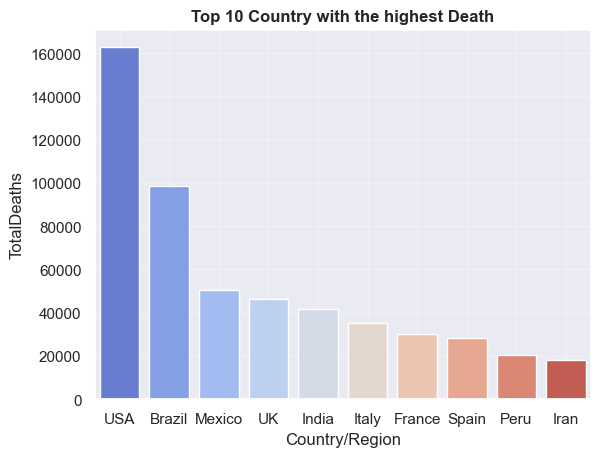

In [40]:
sns.barplot(data=Top_10_death_rate, x= "Country/Region", y=  "TotalDeaths",palette= "coolwarm")
plt.title("Top 10 Country with the highest Death", fontfamily = "Arial", fontweight = "bold", fontsize = 12)
plt.grid(alpha = 0.3)



> **Top 10 Country with the Highest Survival**

In [42]:
Top_10_Survived = cov_19.groupby(['Country/Region'])[["TotalRecovered"]].sum()
Top_10_Survived = cov_19.groupby(['Country/Region'])[["TotalRecovered"]].sum()
Top_10_Survived.sort_values(by= "TotalRecovered", ascending= False, inplace= True)
Top_10_Survived = Top_10_Survived.head(10).reset_index()


In [43]:
Top_10_Survived

,Country/Region,TotalRecovered
0,USA,2576668.0
1,Brazil,2047660.0
2,India,1377384.0
3,Russia,676357.0
4,South Africa,387316.0
5,Chile,340168.0
6,Peru,310337.0
7,Mexico,308848.0
8,Iran,277463.0
9,Pakistan,256058.0


C:\Users\USER\AppData\Local\Temp\ipykernel_16348\1083237042.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Top_10_Survived, x= "Country/Region", y=  "TotalRecovered",palette= "cubehelix")


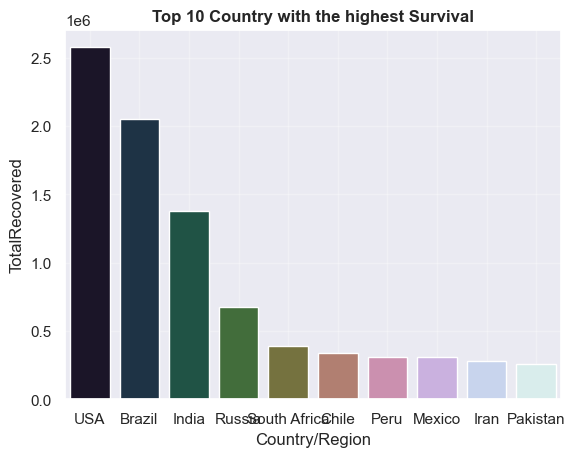

In [44]:
sns.barplot(data=Top_10_Survived, x= "Country/Region", y=  "TotalRecovered",palette= "cubehelix")
plt.title("Top 10 Country with the highest Survival",fontfamily = "Arial", fontweight = "bold", fontsize = 12)
plt.grid(alpha = 0.3)


> **Data Correllation for the case ,death and recovered**

Text(0.5, 1.0, 'Coreelation Data on Case, Survived and Death')

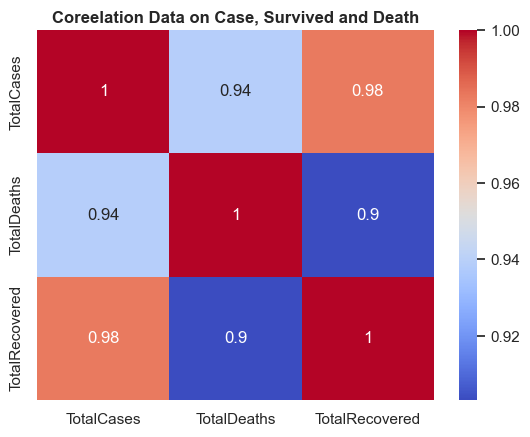

In [46]:

correlation = cov_19[['TotalCases', 'TotalDeaths', 'TotalRecovered']].corr()
sns.heatmap(correlation, annot= True, cmap="coolwarm")
plt.title("Coreelation Data on Case, Survived and Death", fontfamily = "Arial", fontweight = "bold", fontsize = 12)

>**Total Case and Death Overtime**

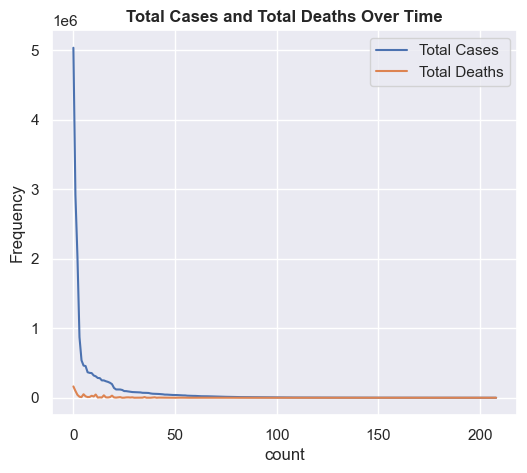

In [48]:
plt.figure(figsize=(6,5))
sns.lineplot(data=cov_19, x=cov_19.index, y="TotalCases", label="Total Cases")
sns.lineplot(data=cov_19, x=cov_19.index, y="TotalDeaths", label="Total Deaths")
plt.title("Total Cases and Total Deaths Over Time", fontfamily = "Arial", fontweight = "bold", fontsize = 12)
plt.xlabel("count")
plt.ylabel("Frequency")
plt.legend()
plt.show()

> **Total Case and Survived Overtime**

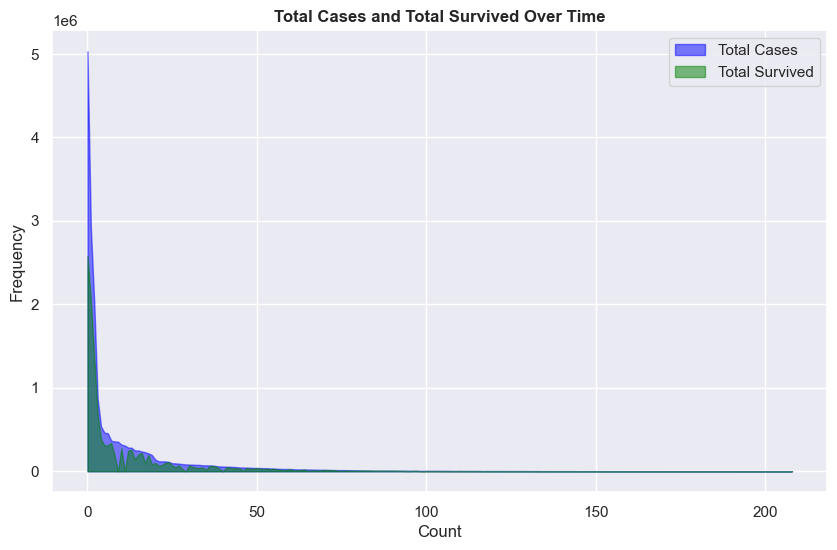

In [50]:
plt.figure(figsize=(10, 6))

plt.fill_between(cov_19.index, cov_19['TotalCases'], color="blue", alpha=0.5, label="Total Cases")
plt.fill_between(cov_19.index, cov_19['TotalRecovered'], color="green", alpha=0.5, label="Total Survived")

plt.title("Total Cases and Total Survived Over Time",fontfamily = "Arial", fontweight = "bold", fontsize = 12)
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.legend()


plt.show()

> **Population Size and Spread of total case**

Text(0, 0.5, 'Total Cases')

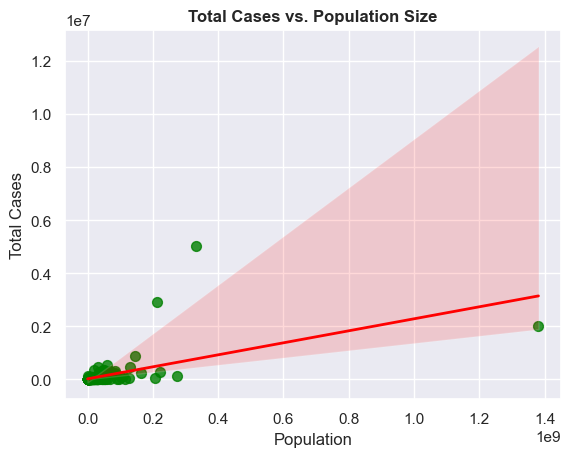

In [52]:
sns.regplot(data=cov_19, x="Population", y="TotalCases",  scatter_kws={"color": "green", "s": 50},   line_kws={"color": "red", "lw": 2})
plt.title("Total Cases vs. Population Size", fontfamily = "Arial", fontweight = "bold", fontsize = 12)
plt.xlabel("Population")
plt.ylabel("Total Cases")

> **Case Density and Mortality Rate**

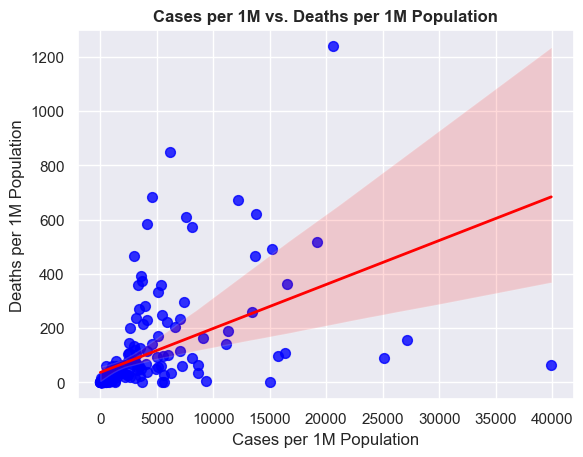

In [54]:
sns.regplot(data=cov_19, x="Tot Cases/1M pop", y="Deaths/1M pop",  scatter_kws={"color": "blue", "s": 50},   line_kws={"color": "red", "lw": 2})
plt.title("Cases per 1M vs. Deaths per 1M Population", fontfamily = "Arial", fontweight = "bold", fontsize = 12)

plt.xlabel("Cases per 1M Population")
plt.ylabel("Deaths per 1M Population")
plt.show()

>**New event that happen(case, death, survived) **

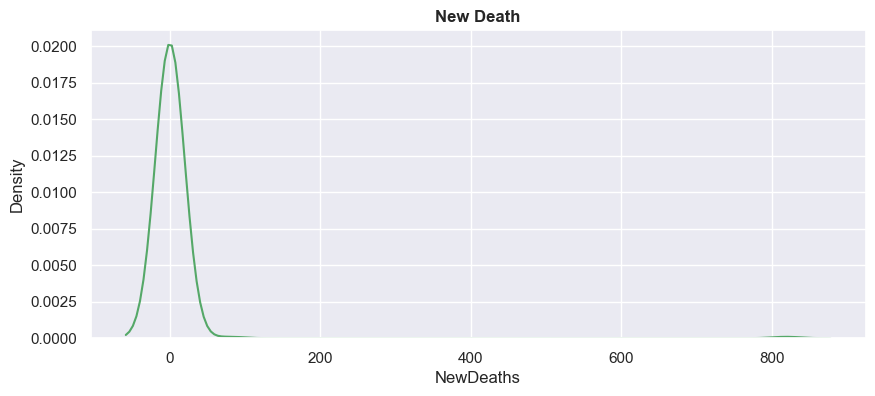

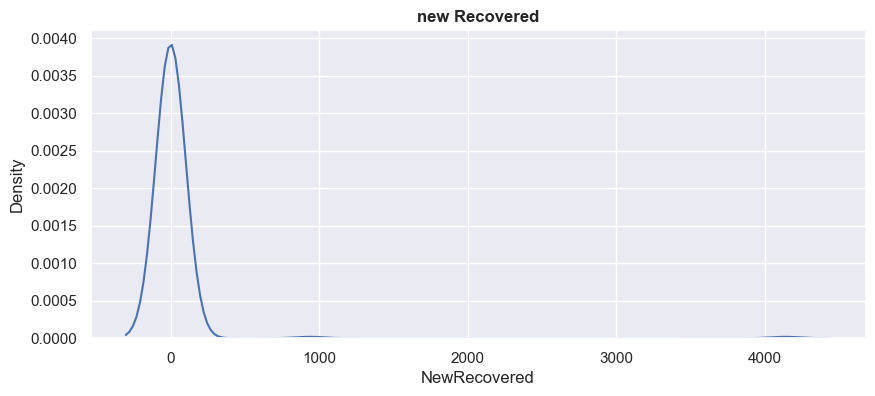

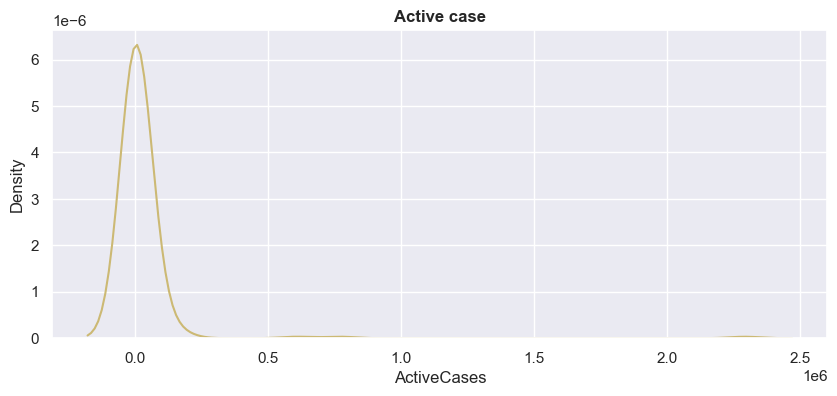

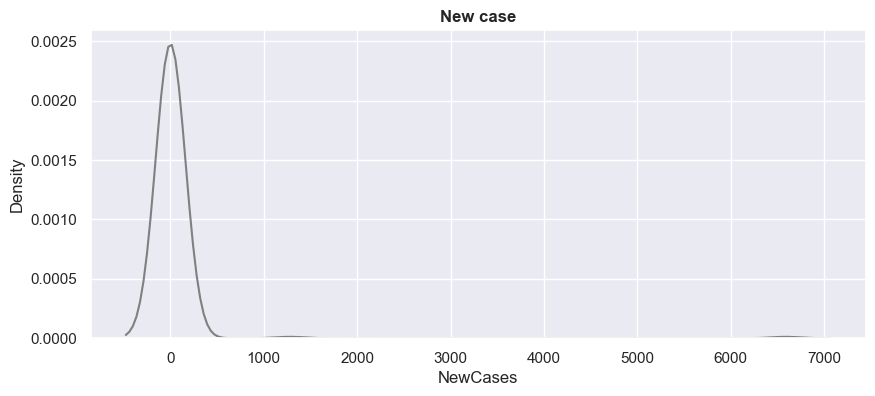

In [56]:

# New Deaths
plt.figure(figsize=(10,4))
ax2 = sns.kdeplot(data=cov_19, x= 'NewDeaths', color='g')
plt.title("New Death", fontfamily = "Arial", fontweight = "bold", fontsize = 12)
plt.show(ax2)

# Recovered
plt.figure(figsize=(10,4))
ax3 = sns.kdeplot(data=cov_19, x='NewRecovered', color='b')
plt.title("new Recovered", fontfamily = "Arial", fontweight = "bold", fontsize = 12)
plt.show(ax3)

# Active
plt.figure(figsize=(10,4))
ax4 = sns.kdeplot(data=cov_19, x='ActiveCases', color='y')
plt.title("Active case", fontfamily = "Arial", fontweight = "bold", fontsize = 12)
plt.show(ax4)

#new case
plt.figure(figsize=(10,4))
ax6 = sns.kdeplot(data=cov_19, x='NewCases', color='gray')
plt.title("New case", fontfamily = "Arial", fontweight = "bold", fontsize = 12)
plt.show(ax6)


 ## **COVID MODELLING**

The **COVID Modeling** part of the project focuses on using machine learning models to predict and classify COVID-19 metrics based on the dataset's features. Here's a detailed breakdown of what happened in this section:


### **COVID Modeling Workflow**

#### **1. Preparing the Features and Target Variables**
- **Feature Selection**:
  - Selected features: 
    `['Population', 'TotalTests', 'Tests/1M pop', 'Tot Cases/1M pop', 'Deaths/1M pop']`.
  - These variables are highly relevant for predicting COVID-19 case numbers and severity.
  
- **Target Selection**:
  - The target variable was `TotalCases`, representing the total number of cases reported for each country.

- **Handling Missing Data**:
  - Missing values in the feature set were imputed using the median of each column to maintain data consistency.

---

#### **2. Feature Scaling**
- Standardization was performed using `StandardScaler` to ensure that all features are on the same scale.
  - Standardizing involves centering data around a mean of 0 and scaling to a unit variance.
  - This step is critical for improving the performance of machine learning algorithms sensitive to feature magnitudes.

---

#### **3. Splitting the Dataset**
- The dataset was divided into training and testing sets using `train_test_split()`:
  - **Training Set (80%)**: Used for training the models.
  - **Testing Set (20%)**: Used for evaluating the models' performance.
  - `random_state=42` was used for reproducibility.

---

#### **4. Linear Regression Model**
- A **Linear Regression** model was trained to predict `TotalCases`:
  - The model attempts to fit a linear relationship between the features and the target variable.
  - Predictions were made on the test set, and performance metrics were calculated:
    - **R² Score**: Indicates how well the model explains the variance in the target variable.
    - **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.
    - **Mean Absolute Error (MAE)**: Measures the average absolute difference between predictions and actual values.
    
---

#### **5. Random Forest Classifier**
- The **Random Forest Classifier** was used to classify the severity of COVID-19 cases:
  - Target variable (`TotalCases`) was converted into categories:
    - Categories: `['Very Low', 'Low', 'Medium', 'High', 'Very High']`.
    - The `pd.qcut()` function was used to bin the target variable into equal quantiles.
  
- The classifier was trained using the training data, and predictions were made on the test set.
  
- **Evaluation Metrics**:
  - **Classification Report**: Provided precision, recall, F1-score, and support for each category.
  - Metrics indicated how well the model classified the severity of cases into the defined categories.

---

#### **6. Feature Importance Analysis**
- The Random Forest model's `feature_importances_` attribute was used to identify which features contributed most to the model's predictions.
- A bar chart was plotted using `sns.barplot()` to visualize the importance of each feature.


> *I am Modelling my data to predict if there is going to be high mortality rate and surviving rate*

### **Why We Decided to Go for Classification?**

In this project, we opted for classification alongside regression to analyze the **severity of COVID-19 cases** rather than only predicting numerical values. The primary reasons include:

1. **Categorical Insights**:
   - Policymakers and healthcare professionals are often more interested in categorizing countries or regions into risk levels (e.g., "Low", "Medium", "High") rather than just looking at raw case numbers.
   - Classification allows us to translate numerical values (e.g., total cases) into actionable labels.

2. **Simplified Communication**:
   - Grouping cases into categories like "Very Low", "Low", etc., makes it easier to communicate findings to non-technical audiences.

3. **Highlighting Trends**:
   - Classification provides insights into patterns of case severity, which might not be evident with continuous values.

4. **Handling Non-Linear Relationships**:
   - Using a Random Forest classifier helps capture non-linear relationships between features and the target variable, which might be missed in regression analysis.





### **Metrics for Classification Problems**

When evaluating classification models, several metrics are commonly used. We focused on metrics like the F1-Score, Precision, Recall, and the Confusion Matrix because they provide a nuanced understanding of the model’s performance, especially in an imbalanced dataset scenario where both false positives and false negatives carry significant implications. These metrics ensure the model delivers actionable and reliable predictions for COVID-19 case severity.

Below is a breakdown of the key metrics, their interpretation, and relevance:


#### **1. Precision**
- **Definition**: Precision measures the proportion of correctly predicted positive observations out of all observations predicted as positive.
- **Formula**:  
  $$\text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}}$$


- **Use Case**: 
  - Useful when false positives are costly (e.g., mistakenly categorizing a country as "High Risk" when it isn't).
  
---

#### **2. Recall (Sensitivity)**
- **Definition**: Recall measures the proportion of actual positive observations correctly identified by the model.
- **Formula**:  
  $$\text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}$$

- **Use Case**:
  - Useful when missing positives is critical (e.g., failing to identify a "High Risk" country).

---

#### **3. F1-Score**
- **Definition**: The F1-score is the harmonic mean of precision and recall. It balances the two metrics and is particularly useful when the dataset is imbalanced.
- **Formula**:  
  $$\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

- **Use Case**:
  - Ideal when precision and recall are equally important and there is a need to balance both.

---

#### **4. Accuracy**
- **Definition**: Accuracy measures the proportion of correctly predicted observations out of all observations.
- **Formula**:  
  $$\text{Accuracy} = \frac{\text{True Positives (TP)} + \text{True Negatives (TN)}}{\text{Total Observations}}$$

- **Use Case**:
  - Commonly used but can be misleading if the data is imbalanced (e.g., if most countries fall into the "Low Risk" category, accuracy might be high even if the model fails to predict other categories well).

---

#### **5. Support**
- **Definition**: Support represents the number of actual occurrences of each category in the dataset.
- **Use Case**:
  - Useful for understanding the distribution of categories in the data and ensuring the model isn't biased toward larger classes.

---

#### **Which Metric is Best for Classification Problems?**
- **For this project**, we focused on **precision, recall, and F1-score** for evaluation:
  - **F1-Score** is the most balanced metric when the dataset is imbalanced (i.e., some categories like "Very Low" or "Very High" might have fewer observations).
  - **Precision** was important to avoid false positives (mislabeling countries as "High Risk").
  - **Recall** ensured that true high-risk countries were correctly identified.


## Our dependent variable is MORTALITY RATE

In [63]:
cov_19['HighMortalityRisk'] = cov_19['TotalDeaths'] > 480

In [64]:
cov_19['HighMortalityRisk'].unique()

array([ True, False])

In [65]:
list(cov_19.columns)

['Country/Region',
 'Continent',
 'Population',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/1M pop',
 'WHO Region',
 'Daily Growth Rate of Cases (%)',
 'Daily Growth Rate of Deaths (%)',
 'Cases per 1M Population',
 'DeathRate',
 'RecoveryRate',
 'HighMortalityRisk']

In [66]:
x = cov_19[['Population',  'TotalCases',  'TotalDeaths', 'TotalRecovered']]
y = cov_19['HighMortalityRisk']

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.5, random_state= 42)

In [68]:
print (y_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)


(104,)
(105, 4)
(104,)
(105,)


**LINEAR REGRESSION**

In [70]:
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression()

In [71]:
y_pred = lin_model.predict(x_test)
y_pred
y_pred.shape

(105,)

In [72]:
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

In [73]:
print ("Mean Square Error",mean_squared_error(y_pred, y_test) )
print("")
print ("r2 Score", r2_score(y_test, y_pred))
print("")
print("classification_report" ,classification_report(y_test, y_pred))



Mean Square Error 0.44761904761904764

r2 Score -1.343304843304844

classification_report               precision    recall  f1-score   support

           0       0.78      1.00      0.88        78
           1       1.00      0.15      0.26        27
           6       0.00      0.00      0.00         0

    accuracy                           0.78       105
   macro avg       0.59      0.38      0.38       105
weighted avg       0.84      0.78      0.72       105



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [74]:
train_predictions = lin_model.predict(x_train)
test_predictions = lin_model.predict(x_test)
print ("x train prediction", train_predictions[0])
print ("x_test prediction", test_predictions[0])

x train prediction 0.4759853281575527
x_test prediction 0.1880386572504473


In [75]:
def new_func():
    y_pred_ = ['Yes' if pred == 1 else 'No' for pred in y_pred]
    single_answer = 'Yes' if y_pred_.count('Yes') > y_pred_.count('No') else 'No'
    print('The level of mortality:', single_answer)

new_func()


The level of mortality: No


> Using linear regression doesn't give the accuracy and mean_square that is useful for the prediction

**LOGISTIC REGRESSION**

In [78]:
model = LogisticRegression()
model.fit(x_train, y_train)


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [79]:
y_pred1 = model.predict(x_test)
y_pred1

array([False,  True, False, False,  True, False, False, False,  True,
       False,  True, False, False,  True,  True,  True, False,  True,
        True, False,  True,  True, False,  True, False, False,  True,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True,  True, False,  True, False, False,  True, False,  True,
        True, False, False, False,  True,  True, False, False,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True, False,  True, False, False,  True, False,  True,
        True, False,  True, False, False,  True,  True, False,  True,
       False,  True, False, False, False, False, False, False,  True,
        True, False,  True,  True, False, False])

In [80]:
mse = mean_squared_error(y_test, y_pred1)
mae = mean_absolute_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

print("MSE:", mse)
print("MAE:", mae)
print("R² Score:", r2)


MSE: 0.22857142857142856
MAE: 0.22857142857142856
R² Score: -0.196581196581197


In [81]:
y_pred1 = (y_pred1.astype(int)  )
print("Classification Report:")
print(classification_report(y_test, y_pred1))



Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.72      0.82        78
           1       0.53      0.93      0.68        27

    accuracy                           0.77       105
   macro avg       0.75      0.82      0.75       105
weighted avg       0.85      0.77      0.79       105



In [82]:
print("Model score:", model.score(x_test, y_test))
print( "accuracy", accuracy_score(y_pred1, y_test))

Model score: 0.7714285714285715
accuracy 0.7714285714285715


In [83]:
y_pred_labels1 = ['Yes' if pred == True else 'No' for pred in y_pred1]
single_answer = 'Yes' if y_pred_labels1.count('Yes') > y_pred_labels1.count('No') else 'No'
print('The level of mortality:', single_answer)


The level of mortality: No


In [84]:
confusion_mat = confusion_matrix(y_pred1, y_test)
confusion_mat

array([[56,  2],
       [22, 25]], dtype=int64)

<Axes: >

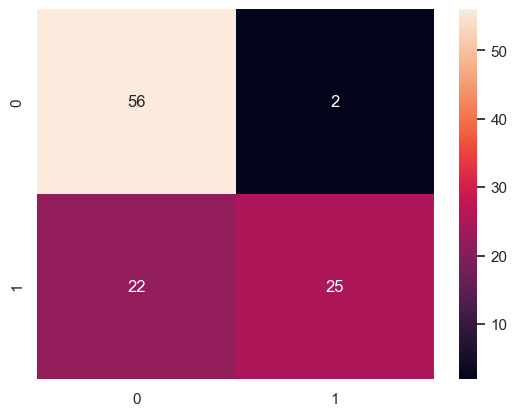

In [85]:
sns.heatmap(confusion_mat, annot=True)

In [86]:
y_pred_labels1.count('No')

58

Text(0, 0.5, 'Count')

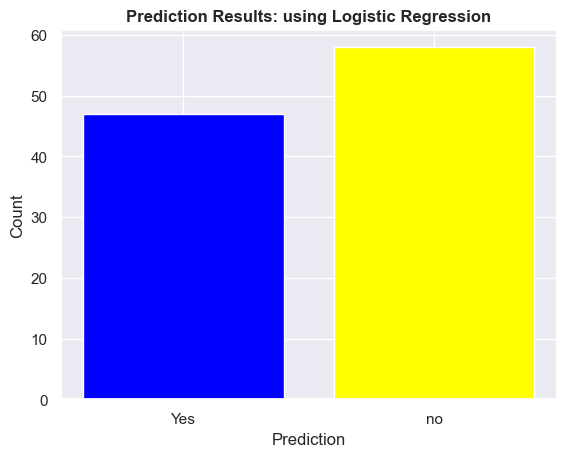

In [87]:
yes_count = y_pred_labels1.count('Yes')
no_count = y_pred_labels1.count('No')
plt.bar(['Yes', 'no'], [yes_count, no_count], color=['blue', 'yellow'])
plt.title('Prediction Results: using Logistic Regression', fontfamily = "Arial", fontweight = "bold", fontsize = 12)
plt.xlabel('Prediction')
plt.ylabel('Count')


**USING DECISION TREE CLASSIFIER**

In [89]:
decision1 = DecisionTreeClassifier()
decision1.fit(x_train, y_train)

DecisionTreeClassifier()

In [90]:
y_pred2= decision1.predict(x_test)
mse = mean_squared_error(y_test, y_pred2)
print(f"Regression Model Mean Squared Error: {mse}")
print ("accuracy", accuracy_score(y_test, y_pred2))

Regression Model Mean Squared Error: 0.01904761904761905
accuracy 0.9809523809523809


In [91]:
y_pred_labels2 = ['Yes' if pred == True else 'No' for pred in y_pred2]
single_answer2 = 'Yes' if y_pred_labels2.count('Yes') > y_pred_labels2.count('No') else 'No'
print('The level of mortality:', single_answer)


The level of mortality: No


(-1.0999992043637574,
 1.0999983239196462,
 -1.0999956671932352,
 1.0999997936758683)

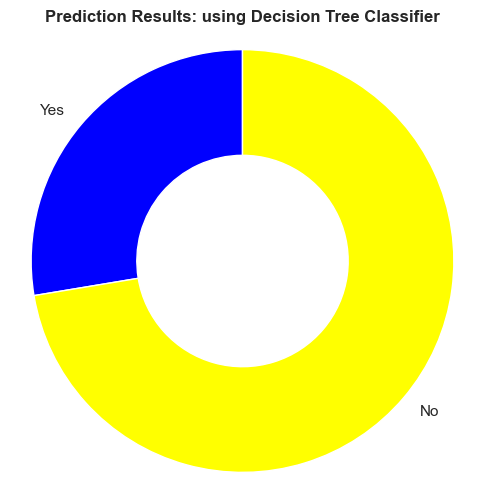

In [92]:
yes_count = y_pred_labels2.count('Yes')
no_count = y_pred_labels2.count('No')
labels = ['Yes', 'No']
sizes = [yes_count, no_count]
colors = ['blue', 'yellow']
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, labels=labels, colors=colors,  startangle=90, wedgeprops=dict(width=0.5))
plt.title('Prediction Results: using Decision Tree Classifier', fontfamily = "Arial", fontweight = "bold", fontsize = 12)
ax.axis('equal')


**USING RANDOM FOREST CLASSIFIER**

In [94]:
Ran_model = RandomForestClassifier(n_estimators=100, random_state=42)  
Ran_model.fit(x_train, y_train)
y_pred3 = Ran_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred3)

accuracy

0.9714285714285714

In [95]:

report = classification_report(y_test, y_pred3)
print (report)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        78
           1       0.90      1.00      0.95        27

    accuracy                           0.97       105
   macro avg       0.95      0.98      0.96       105
weighted avg       0.97      0.97      0.97       105



In [96]:
y_pred_labels3 = ['Yes' if pred == True else 'No' for pred in y_pred3]
single_answer = 'Yes' if y_pred_labels3.count('Yes') > y_pred_labels3.count('No') else 'No'
print('The level of mortality:', single_answer)


The level of mortality: No


In [97]:
y_pred_labels3.count('Yes')

30

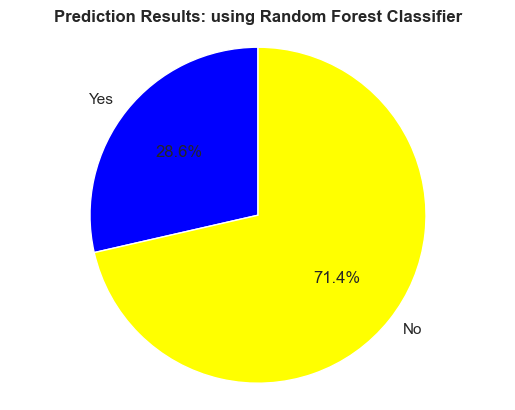

In [98]:
yes_count = y_pred_labels3.count('Yes')
no_count = y_pred_labels3.count('No')
labels = ['Yes', 'No']
sizes = [yes_count, no_count]
colors = ['blue', 'yellow']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Prediction Results: using Random Forest Classifier', fontfamily = "Arial", fontweight = "bold", fontsize = 12)
plt.show()




### **Key Takeaways**
1. **Linear Regression**:
   - Provided a baseline for predicting `TotalCases`.
   - While performance was reasonable, the R² score was not perfect, indicating room for improvement.

2. **Random Forest Classifier**:
   - Performed well in classifying the severity of COVID-19 cases.
   - Features like `Tests/1M pop` and `Population` were found to be critical predictors.

3. **Insights**:
   - Countries with higher testing rates and large populations tend to have more severe case categories.
   - Random Forest's ability to handle non-linear relationships made it more suitable for classification tasks.

4. **Limitations**:
   - Models did not include temporal dynamics, such as the progression of cases over time.
   - Predictions might be affected by inconsistencies in the dataset or missing data.


## SURVIVING RATE

**LOGISTIC REGRESSION**

In [103]:
cov_19['SurvivalRate'] = ((cov_19['TotalRecovered'] / cov_19['TotalCases']) * 100) > 50
x = cov_19[['Population',  'TotalCases',  'TotalDeaths', 'TotalRecovered']]
Y = cov_19['SurvivalRate']

In [104]:
cov_19['SurvivalRate'].unique()

array([ True, False])

In [105]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x, Y, test_size= 0.5, random_state= 42)
model.fit(x1_train, y1_train)
y4_pred = model.predict(x1_test)
y4_pred

print(f"Regression Model Mean Squared Error: {mse}")
print ("accuracy", accuracy_score(y1_test, y4_pred))
print ("accuracy", classification_report(y4_pred, y1_test))

Regression Model Mean Squared Error: 0.01904761904761905
accuracy 1.0
accuracy               precision    recall  f1-score   support

       False       1.00      1.00      1.00        23
        True       1.00      1.00      1.00        82

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [106]:
y_pred_labels4 = ['Yes' if pred == True else 'No' for pred in y4_pred]
single_answer = 'Yes' if y_pred_labels4.count('Yes') > y_pred_labels4.count('No') else 'No'
print('The level of Survived:', single_answer)


The level of Survived: Yes


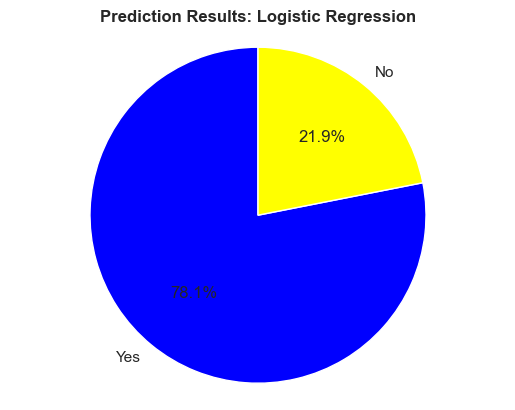

In [107]:
yes_count = y_pred_labels4.count('Yes')
no_count = y_pred_labels4.count('No')
labels = ['Yes', 'No']
sizes = [yes_count, no_count]
colors = ['blue', 'yellow']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Prediction Results: Logistic Regression', fontfamily = "Arial", fontweight = "bold", fontsize = 12)
plt.show()

**USING RANDOM FOREST**

In [109]:
Ran_model.fit(x1_train, y1_train)
y5_pred = Ran_model.predict(x1_test)
y5_pred
print ("accuracy", accuracy_score(y5_pred, y1_test))


accuracy 0.8666666666666667


In [110]:
y_pred_labels5 = ['Yes' if pred == True else "No" for pred in y5_pred]
Answer = 'Yes' if y_pred_labels5.count("Yes") > y_pred_labels5.count("No") else "No" 
print ('Prediction Result:', Answer)

Prediction Result: Yes


Text(0, 0.5, 'Prediction')

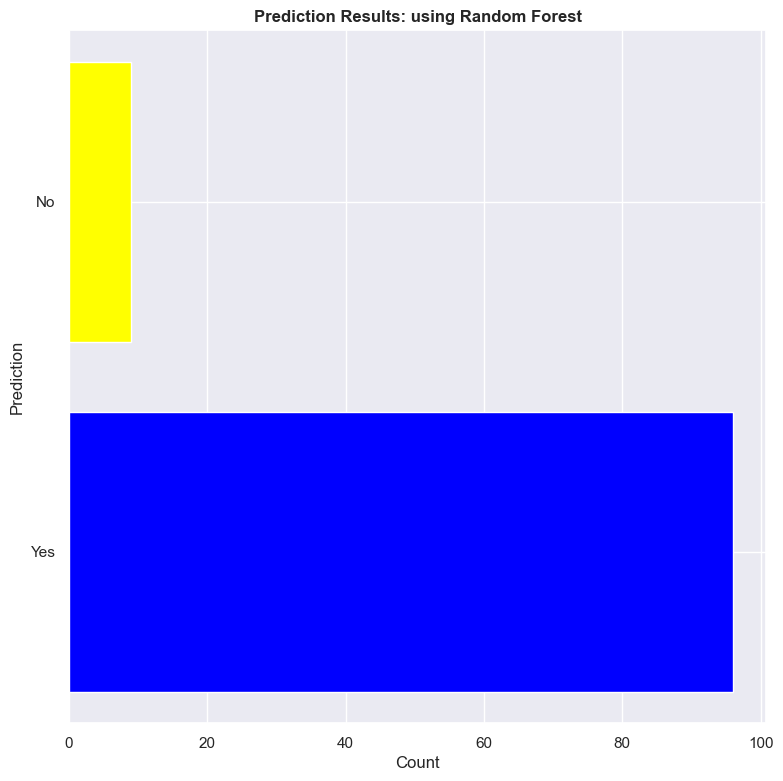

In [111]:
No_count1 = y_pred_labels5.count("No")
Yes_count1 = y_pred_labels5.count("Yes")
plt.figure(figsize=(9, 9))
plt.barh(["Yes","No"], [Yes_count1, No_count1], color = ["Blue", "Yellow"])
plt.title('Prediction Results: using Random Forest', fontfamily = "Arial", fontweight = "bold", fontsize = 12)
plt.xlabel('Count')
plt.ylabel('Prediction')


### **Key Takeaways from the Survival Rate Analysis**

1. **Definition of Survival Rate**:
   - Survival rate, derived as the percentage of recoveries from total cases, gives insight into the effectiveness of healthcare systems and disease management strategies.

2. **Global Trends**:
   - Countries with **higher recovery rates** tend to have better healthcare infrastructure and timely intervention.
   - Conversely, **lower recovery rates** may indicate overwhelmed healthcare systems, late interventions, or lack of adequate medical resources.

3. **Factors Influencing Survival Rate**:
   - **Healthcare Quality**: Access to hospitals, medical staff, and ICU beds significantly impacts survival rates.
   - **Demographics**: Countries with older populations may have lower survival rates due to higher vulnerabilities.
   - **Testing and Reporting**: Countries with extensive testing may report higher survival rates as more mild cases are detected.

4. **Observed Patterns**:
   - Countries with low case fatality rates often exhibit high survival rates, highlighting effective pandemic management strategies.
   - Survival rates are influenced by population density, socioeconomic factors, and regional health policies.

5. **Insights for Policy Making**:
   - Investments in healthcare infrastructure, early testing, and preventive measures can improve survival outcomes.
   - Understanding survival rate trends helps allocate resources effectively, especially in regions with low rates.

6. **Limitations**:
   - Survival rates depend on accurate reporting. Inconsistent or delayed data reporting can skew the analysis.
   - Differences in how recoveries are defined and reported across countries introduce variability. 


### Conclusion

The analysis conducted in the notebook provides critical insights into the COVID-19 pandemic by leveraging data from various countries. Through a combination of exploratory data analysis, feature engineering, and machine learning techniques, the project achieves the following:

1. **Understanding Global Trends**:
   - The dataset revealed disparities in COVID-19 metrics like cases, deaths, and recoveries across different continents and countries. Metrics such as case fatality rates and recovery rates highlighted the varying impacts of the pandemic.

2. **Feature Engineering for Deeper Insights**:
   - Derived metrics like daily growth rates and cases per population offered a clearer understanding of the pandemic's dynamics, enabling fair comparisons between countries regardless of population size.

3. **Modeling and Predictions**:
   - Machine learning models, including Linear Regression and Random Forest, were utilized to predict total cases and classify case severity categories. These models demonstrated the importance of features such as population size and testing rates in influencing COVID-19 metrics.

4. **Key Takeaways**:
   - The correlation analysis highlighted strong relationships between testing rates, population size, and total cases, emphasizing the role of mass testing in identifying and mitigating the spread of the virus.
   - Visualization of top-affected countries and continent-level summaries provided actionable insights into regional pandemic trends.

5. **Challenges and Limitations**:
   - Missing data required imputation, which could introduce biases.
   - The analysis relied on static data and did not account for temporal changes or evolving policies.

### Final Thoughts
##### This project underscores the value of data analytics in understanding and responding to public health crises. By combining statistical analysis and machine learning, we can gain actionable insights that aid in decision-making, policy formulation, and resource allocation. Moving forward, integrating real-time data and considering socio-economic factors could further enhance the analysis and its impact.